In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.sample(5)

,label,text
57882,0,"vince ,\nhappy boss day ! you have been a wond..."
32675,0,author gd date escapenumber escapenumber escap...
59096,0,alert name bush immigration iraq war dominate ...
68520,0,thank you very much that was indeed the proble...
61950,1,they are completely affordable to you . stay f...


In [4]:
df.shape

(83448, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
df.duplicated().sum()

0

EDA

In [8]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

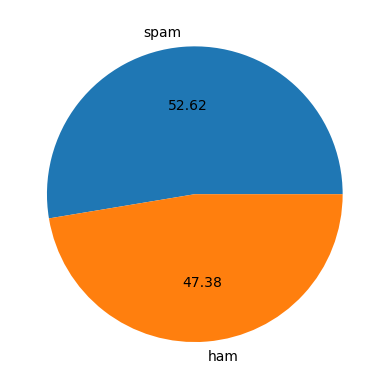

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels = ['spam', 'ham'], autopct = "%0.2f")
plt.show()

In [10]:
import nltk

In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
df['num_characters'] = df['text'].apply(len)

In [13]:
df.head()

,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [14]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [15]:
df.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [16]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [18]:
df.sample(5)

,label,text,num_characters,num_words,num_sentences
81016,0,on escapenumber escapenumber escapenumber luis...,1257,211,1
45725,0,hello i need help i create a boxplot but the n...,4116,749,1
40798,1,inexpensive private shipping of all pharmecuti...,72,10,1
78350,0,hi all since the bzr postings to samba cvs cho...,217,44,1
41247,0,below is the link to the print - ready valpak ...,308,62,5


In [19]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000
mean,1662.952725,285.022733,7.250060
std,4178.578068,727.032941,34.832317
min,1.000000,1.000000,1.000000
25%,449.000000,80.000000,1.000000
50%,879.000000,154.000000,1.000000
75%,1861.000000,314.000000,5.000000
max,598705.000000,101984.000000,3093.000000


In [22]:
#ham
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [24]:
#spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

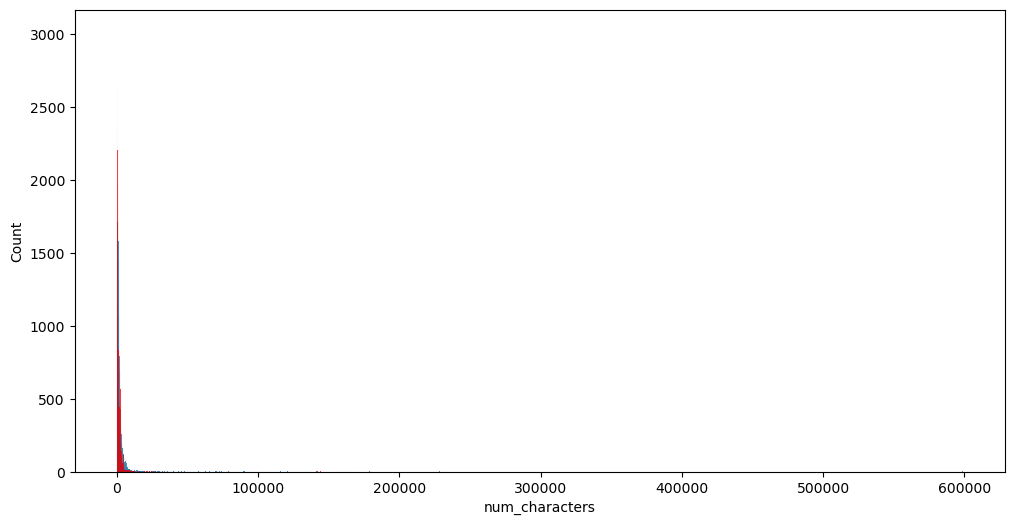

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

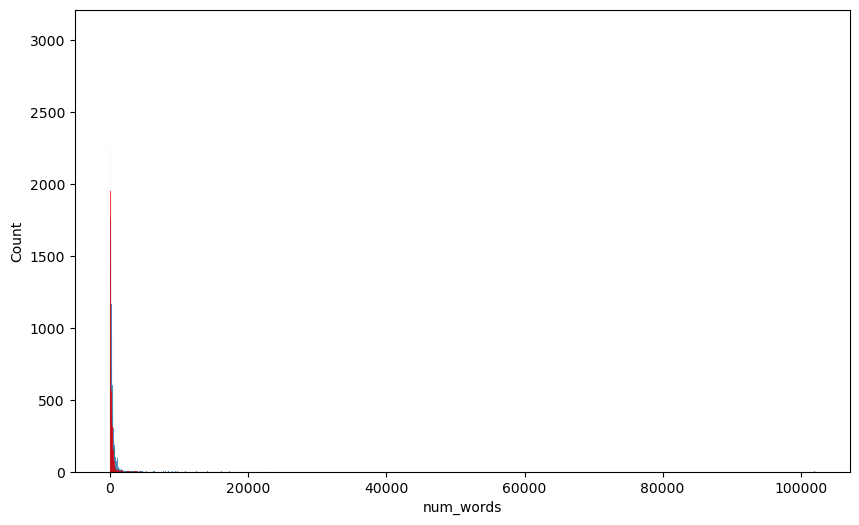

In [33]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')

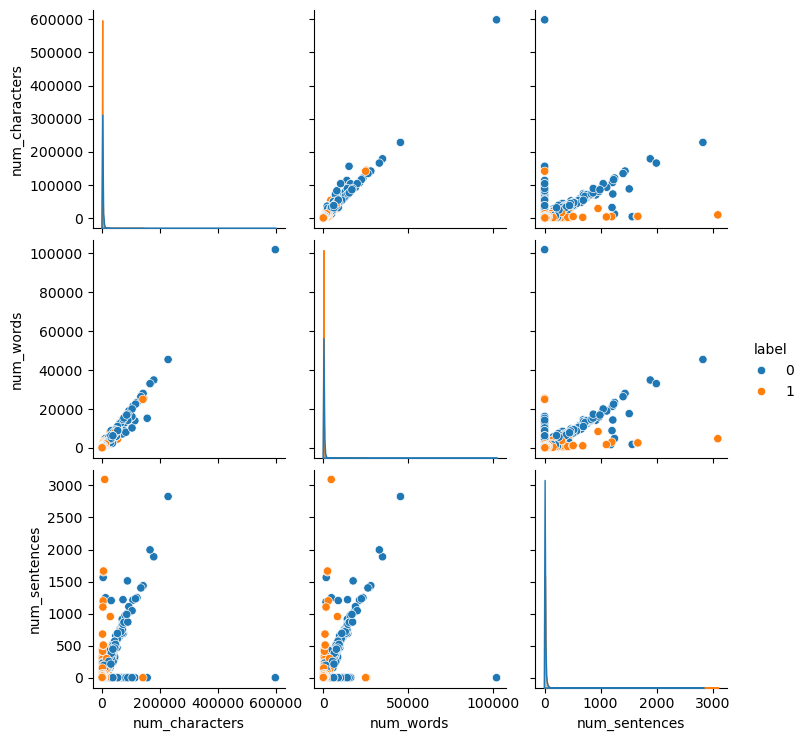

In [34]:
sns.pairplot(df, hue = 'label')